<a href="https://colab.research.google.com/github/ulisses-adonis/.Artificial-neural-network--projects/blob/main/CNN_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

Esse conjunto possui cinquenta mil imagens e com dimensões  32 x 32. Ainda possui três canais de cores:  verde, vermelho e azul.

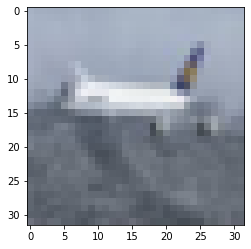

In [5]:
plt.imshow(x_train[199])

In [6]:
x_train[0].max()

255

In [7]:
print(y_train[0])

[6]


In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [10]:
y_train[0]

array([6], dtype=uint8)

In [11]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

Esse modelo sequencial  será muito parecido com o anterior ( em escala cinza). E aqui eu faço um parenteses para mim no futuro: **lembre-se de que a forma de entrada é definida por nossos dados**. Verifique sempre o "x_test.shape".

**Outro lembrete para um futuro próximo:** o número total de valores em uma imagem colorida nesse conjunto é 32 x 32 x 3 = 3072. Há mais informações nesta imagem colorida do que no caso anterior e por isso,  à medida que minhas imagens ficam mais complexas e maiores, devo acrescentar mais camadas.

complexidade para a cor que adicionamos em mais camadas de composição e extração.

In [13]:
model = Sequential()

In [14]:
#CONVOLUTIONAL LAYER_1
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
#POOLING LAYER
model.add (MaxPool2D(pool_size=(2,2)))
model.output_shape


(None, 14, 14, 32)

In [15]:
#CONVOLUTIONAL LAYER_2
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
#POOLING LAYER
model.add (MaxPool2D(pool_size=(2,2)))
model.output_shape

(None, 5, 5, 32)

In [16]:
model.add(Flatten())

# Devido a complexidade, resolvi aumentar o número de neurônios
model.add(Dense(256,activation='relu'))

#última camada, lembre-se de usar o mesmo número de categorias.
model.add(Dense(10,activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
from tensorflow.keras.callbacks import EarlyStopping  
early_stop = EarlyStopping ( monitor='val_loss',patience=2)


In [19]:
model.fit(x_train,y_cat_train,epochs=20,validation_data = (x_test,y_cat_test), callbacks =[early_stop])

Epoch 1/20
1563/1563 [==============================] - 62s 39ms/step - loss: 3.4313 - accuracy: 0.1314 - val_loss: 2.2260 - val_accuracy: 0.1892
Epoch 2/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.9163 - accuracy: 0.2980 - val_loss: 1.5464 - val_accuracy: 0.4434
Epoch 3/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4786 - accuracy: 0.4672 - val_loss: 1.4048 - val_accuracy: 0.5115
Epoch 4/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.2990 - accuracy: 0.5417 - val_loss: 1.3260 - val_accuracy: 0.5293
Epoch 5/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1799 - accuracy: 0.5889 - val_loss: 1.2589 - val_accuracy: 0.5622
Epoch 6/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0753 - accuracy: 0.6280 - val_loss: 1.2626 - val_accuracy: 0.5728
Epoch 7/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9972 - accuracy: 0.6511 - val_loss: 1.3242 -

In [20]:
metrics =pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,2.456538,0.13650,2.226026,0.1892
1,1.764007,0.35584,1.546400,0.4434
2,1.446587,0.48260,1.404763,0.5115
3,1.295922,0.54484,1.326040,0.5293
4,1.195213,0.58476,1.258909,0.5622
5,1.100790,0.61956,1.262561,0.5728
6,1.021982,0.64458,1.324245,0.5684


 Podemos obter as métricas de avaliação finais olhando a última linha da tabela metrics.

In [22]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

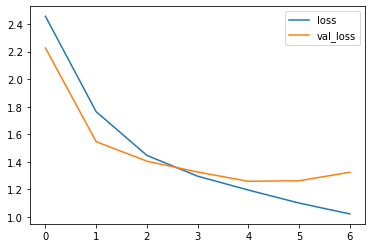

In [23]:
metrics[['loss','val_loss']].plot()

Neste gráfico podemos ver a dimunição na perda do treinamento , mas não obtemos nenhuma melhoria na perda de validação.

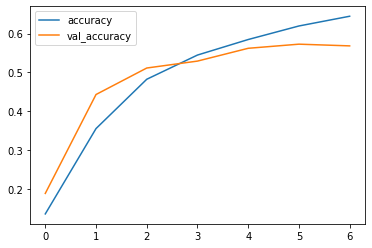

In [24]:
metrics[['accuracy',  'val_accuracy']].plot()

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60      1000
           1       0.76      0.64      0.70      1000
           2       0.46      0.47      0.47      1000
           3       0.43      0.35      0.39      1000
           4       0.46      0.49      0.48      1000
           5       0.49      0.47      0.48      1000
           6       0.60      0.74      0.66      1000
           7       0.66      0.62      0.64      1000
           8       0.56      0.77      0.65      1000
           9       0.75      0.53      0.62      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



Outra métrica interessante é comparar os números reais versus nossas previsões.
Através  da tabela acima podemos ver nossa precisão e uma pontuação f1, bem como nossa exatidão geral.
Portanto, o que eu quero é saber o quão boa é a precisão , que nesse caso é igual a 69%.

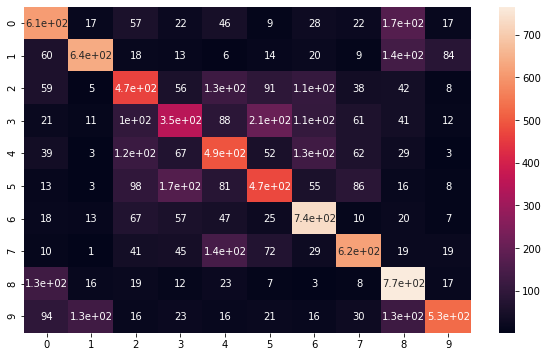

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

#Testando o Modelo

Portanto, se quiséssemos prever uma imagem, lembre-se de que os dados já foram dimensionados.
Portanto, se uma imagem bruta for selecionada, tenho que redimensioná-la (dividimdo por 255).

In [47]:
minha_imagem=x_test[0]
minha_imagem.shape

(32, 32, 3)

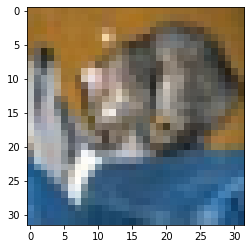

In [31]:
plt.imshow(minha_imagem)

In [35]:
#num_images, width, heigth, color_channels
model.predict_classes(minha_imagem.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6])

In [46]:
minha_imagem2=x_test[16]
minha_imagem2.shape

(32, 32, 3)

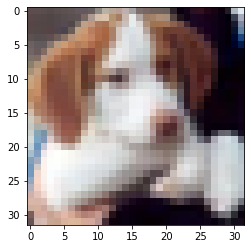

In [38]:
plt.imshow(minha_imagem2)

In [39]:
#num_images, width, heigth, color_channels
model.predict_classes(minha_imagem2.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])

In [63]:
from PIL import Image, ImageFilter

In [64]:
minha_imagem67 = Image.open('/content/gato_teste.jpg')

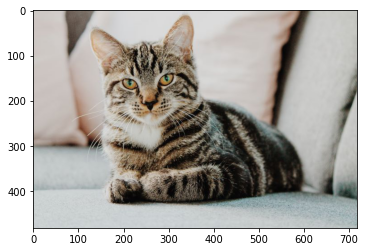

In [65]:
plt.imshow(minha_imagem67)

In [72]:
minha_imagem3 = minha_imagem/255
minha_imagem67.size


(718, 482)

In [71]:
model.predict_classes(minha_imagem67.reshape(1,32,32,3))

AttributeError: ignored